In [45]:
# Defining the range of 'x', the independent variable
x_range = [-2000, 2000]

# Defining the extent of noise, which would be added to both the dependent as well as the independent variable
deviation = 100

# For the data points to roughly fall on a staright line, we need to define the slope and the intercept of that line
# Let's intoduce some randomness in the slope and intercept selection process
m_synthetic = random.randint(-100, 100)/100. # m_synthetic is real number from the set(-1.0, -0.99, -0.98 ...., 0.98, 0.99, 1.0)
c_synthetic = random.randint(-10, 10)        # c_synthetic is an integer from the set(-10, -9, -8 ..., 8, 9, 10)

print('\nm_synthetic: {}'.format(m_synthetic))
print('c_synthetic: {}'.format(c_synthetic))


m_synthetic: -0.05
c_synthetic: 8


In [46]:
# Defining the number of data points to be generated
num_points = 100

# Let's generate the synthetic data points
x_list = []
y_list = []
for _ in range(num_points):
    
    # Selecting a random integer from the predefined range
    x = random.randint(x_range[0] , x_range[1])
    
    # Calculating the dependent valiable 'y' using the formula of a straight line y = mx + c
    y = m_synthetic*x + c_synthetic
    
    # Randomly choosing the deviation (noise) for both the dependent as well as the independent variable, so that the dataset becomes a little noisy
    deviation_x = random.randint(-deviation , deviation)
    deviation_y = random.randint(-deviation , deviation)
    
    # Finally, appending the noisy data points in the respective lists
    x_list.append(x + deviation_x)
    y_list.append(y + deviation_y)

x_min, y_min, x_max, y_max = min(x_list) , min(y_list) , max(x_list) , max(y_list)
print('\nFollowing are the extreme ends of the synthetic data points...')
print('x_min, x_max: {}, {}'.format(x_min, x_max))
print('y_min, y_max: {}, {}'.format(y_min, y_max))


Following are the extreme ends of the synthetic data points...
x_min, x_max: -1959, 1973
y_min, y_max: -162.65, 187.0


In [47]:
# Defining the model architecture.
class LinearRegressionModel(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)  # this layer of the model has a single neuron, that takes in one scalar input and gives out one scalar output. 
  
    def forward(self, x): 
        y_pred = self.linear(x) 
        return y_pred 

# Creating the model
model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [56]:
# Defining the Loss Function
# Mean Squared Error is the most common choice of Loss Function for Linear Regression models.
criterion = torch.nn.MSELoss()

# Defining the Optimizer, which would update all the trainable parameters of the model, making the model learn the data distribution better and hence fit the distribution better.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005) 

In [57]:
# We also need to convert all the data into tensors before we could use them for training our model.
data_x = torch.tensor([[x] for x in x_list], dtype = torch.float)
data_y = torch.tensor([[y] for y in y_list], dtype = torch.float)

In [58]:
losses = []         # to keep track of the epoch lossese 
slope_list = []     # to keep track of the slope learnt by the model
intercept_list = [] # to keep track of the intercept learnt by the model

EPOCHS = 25000
print('\nTRAINING...')
for epoch in range(EPOCHS):
    # We need to clear the gradients of the optimizer before running the back-propagation in PyTorch
    optimizer.zero_grad() 
    
    # Feeding the input data in the model and getting out the predictions
    pred_y = model(data_x)

    # Calculating the loss using the model's predictions and the real y values
    loss = criterion(pred_y, data_y) 

    # Back-Propagation
    loss.backward() 
    
    # Updating all the trainable parameters
    optimizer.step()
    
    # Appending the loss.item() (a scalar value)
    losses.append(loss.item())
    
    # Appending the learnt slope and intercept   
    slope_list.append(model.linear.weight.item())
    intercept_list.append(model.linear.bias.item())
    
    # We print out the losses after every 2000 epochs
    if (epoch)%100 == 0:
        print('loss: ', loss.item())


TRAINING...
loss:  3302.290283203125
loss:  3301.752197265625
loss:  3301.22119140625
loss:  3300.69775390625
loss:  3300.180908203125
loss:  3299.671630859375
loss:  3299.168701171875
loss:  3298.6728515625
loss:  3298.18310546875
loss:  3297.7001953125
loss:  3297.22412109375
loss:  3296.753662109375
loss:  3296.289794921875
loss:  3295.831298828125
loss:  3295.379638671875
loss:  3294.933837890625
loss:  3294.4931640625
loss:  3294.05908203125
loss:  3293.63037109375
loss:  3293.207275390625
loss:  3292.789306640625
loss:  3292.377197265625
loss:  3291.970703125
loss:  3291.569091796875
loss:  3291.1728515625
loss:  3290.781982421875
loss:  3290.39599609375
loss:  3290.015380859375
loss:  3289.6396484375
loss:  3289.26904296875
loss:  3288.903076171875
loss:  3288.543212890625
loss:  3288.1865234375
loss:  3287.8369140625
loss:  3287.4892578125
loss:  3287.1474609375
loss:  3286.810546875
loss:  3286.478759765625
loss:  3286.151611328125
loss:  3285.828369140625
loss:  3285.5102539

Text(0, 0.5, 'Loss')

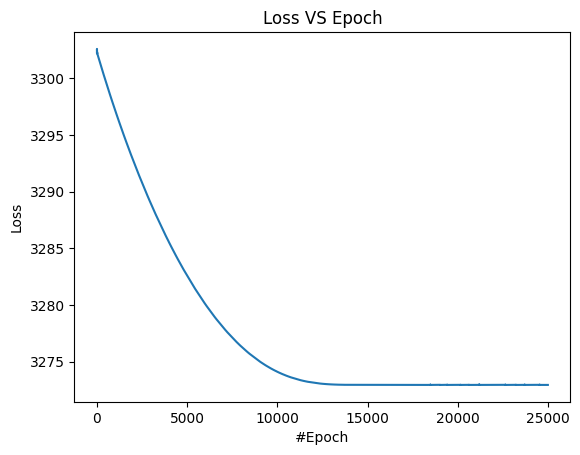

In [59]:
# Let's see what are the learnt parameters after having trained the model for hundreds of epochs
m_learnt = model.linear.weight.item()
c_learnt = model.linear.bias.item()

plt.plot(losses)
plt.title('Loss VS Epoch')
plt.xlabel('#Epoch')
plt.ylabel('Loss')

Text(0, 0.5, "Dependent Variable 'y'")

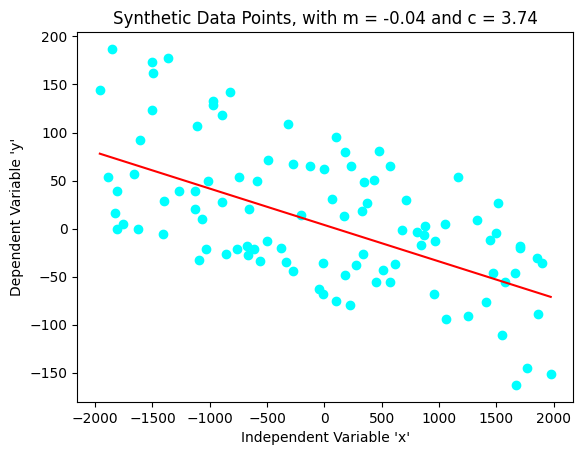

In [55]:
plt.scatter(x_list, y_list , color = 'cyan')
plt.plot((x_min, x_max), (m_learnt*x_min + c_learnt, m_learnt*x_max + c_learnt), color = 'r')
plt.title('Synthetic Data Points, with m = {} and c = {}'.format(round(m_learnt, 2), round(c_learnt, 2)))
plt.xlabel("Independent Variable 'x'")
plt.ylabel("Dependent Variable 'y'")